<a href="https://colab.research.google.com/github/aakashraj-99/Hands-on-Tensorflow/blob/master/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING...**

In [5]:
import tensorflow as tf

print(tf.__version__)

2.6.0


**CALLBACK CLASS...**

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

**MAIN...**

In [7]:
def train_mnist():
    
    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()

    import numpy as np
    np.set_printoptions(linewidth = 200)
    import matplotlib.pyplot as plt
    plt.imshow(x_train[32])
    print(y_train[32])
    print(x_train[32])

    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    # model fitting
    
    return history.epoch, history.history['accuracy'][-1]

**RESULT**

6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 132 255 225  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3 128 246 183 128  46   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  91 254 134   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  54 235 204   7   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 158 252 120   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  63 251 165   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 107 254 138   0   0   0   0   0 

([0, 1, 2, 3, 4], 0.9909166693687439)

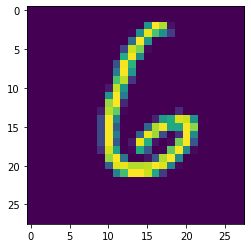

In [8]:
train_mnist()